In [ ]:
#Imports and libraries

#Exploratory  Analysis
import pandas as pd
import numpy as np
import datetime as dt

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import iplot
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)



In [ ]:
#Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Understanding our Data

In [ ]:
#Reading in the data
df = pd.read_table("/content/drive/MyDrive/Colab Notebooks/Joint project with Muna/fruit_data_with_colors (1).txt")
df.head(15)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [ ]:
#what data types
df.dtypes

fruit_label        int64
fruit_name        object
fruit_subtype     object
mass               int64
width            float64
height           float64
color_score      float64
dtype: object

In [ ]:
#Statistical summary of the data
df.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


In [ ]:
#Drop the unnnecessary columns
df.drop(['fruit_name', 'fruit_subtype'], axis=1, inplace=True)

In [ ]:
df.shape

(59, 5)

###Progress so far
---------------
Recognised the target variable as fruit_label

Dropped object columns 

Got a statistical summary of the data

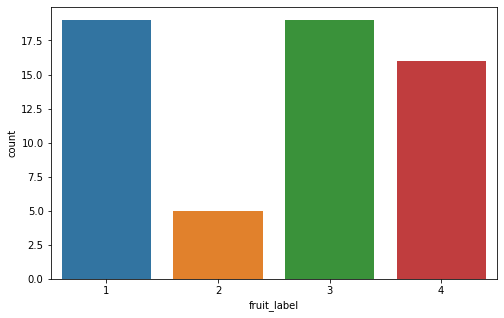

In [ ]:
#Visualise the distrubution of the target
plt.figure(figsize = (8,5))
sns.countplot(data = df, x = df['fruit_label'])
plt.show()

### Distribution of target variable
["fruit_label"] shows near even distribution for labels 1 and 3, 
however label 2 is severely underrepresented in the data and this may be a point of bias in whatever model. It will be important to compute the null accuracy score and confusion matrix



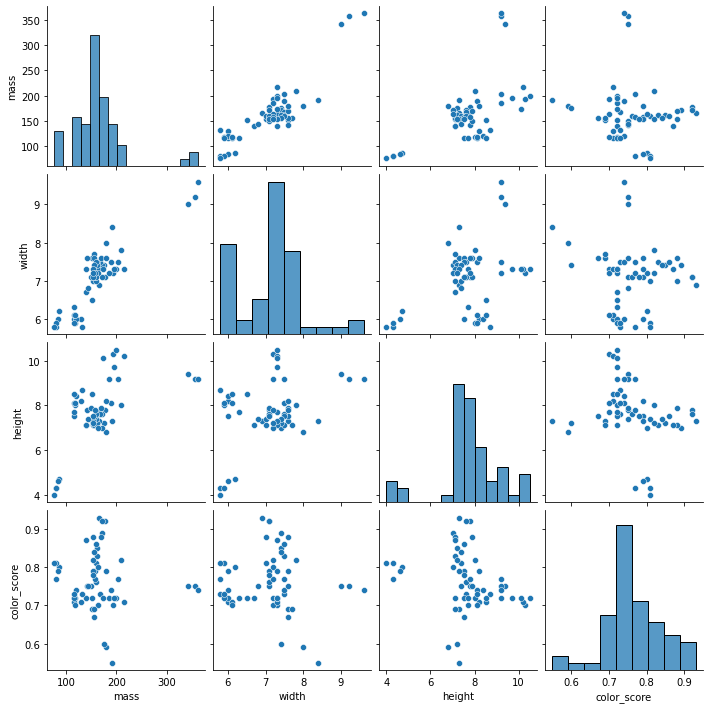

In [ ]:
#Visualising the pairplots
sns.pairplot(df.drop("fruit_label", axis = 1))
plt.show()

### 

### Need to scale the dataset

From the statistical summaries and the pairplots, we can see that the columns have wildly different scales. Consider ["mass"] and ["color score"]. You can see the differences in the magnitudes of the values

In [ ]:
#Import the scaler 
from sklearn.preprocessing import MinMaxScaler
#instantiate the tool, as with most sklearn tools
mm = MinMaxScaler()
#the results is a list
df_transform = mm.fit_transform(df[['mass', 'width','height','color_score']])
#create the dataframe
dataframe=pd.DataFrame(df_transform)
#Set the column names
dataframe.columns = ['mass', 'width','height','color_score']
#Insert the fruit_label from the original dataframe
dataframe.insert(0, 'fruit_label', df['fruit_label'])
#setDF to dataframe
df = dataframe

In [ ]:
df.head()

,fruit_label,mass,width,height,color_score
0,1,0.405594,0.684211,0.507692,0.000000
1,1,0.363636,0.578947,0.430769,0.105263
2,1,0.349650,0.421053,0.492308,0.131579
3,2,0.034965,0.105263,0.107692,0.657895
4,2,0.027972,0.052632,0.092308,0.631579


Plotting features against the target variable

In [ ]:
def tgt_plot(y):
  plt.figure(figsize=(8,6))
  sns.boxplot(data = df, x = df['fruit_label'], y = df[y])
  plt.show()

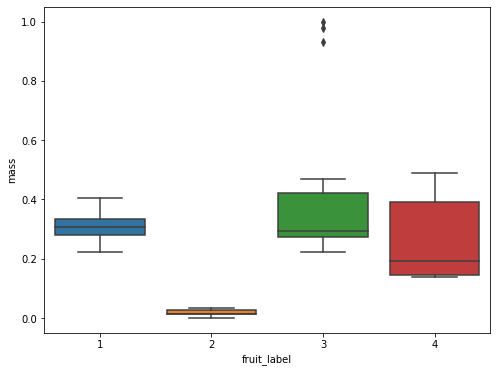

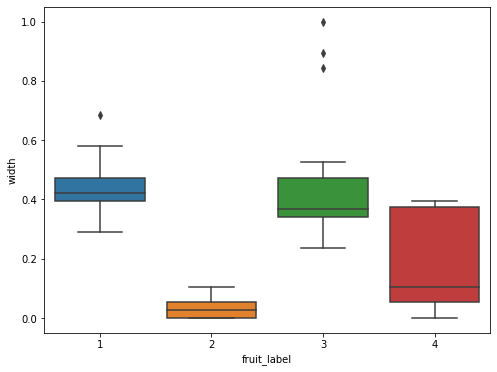

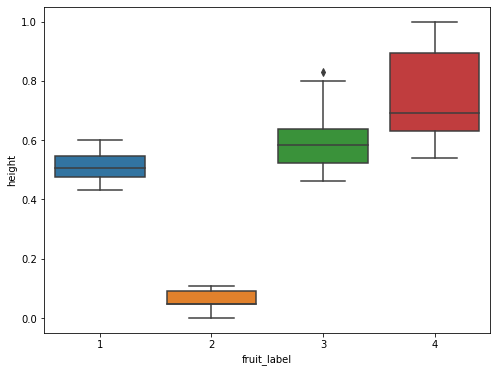

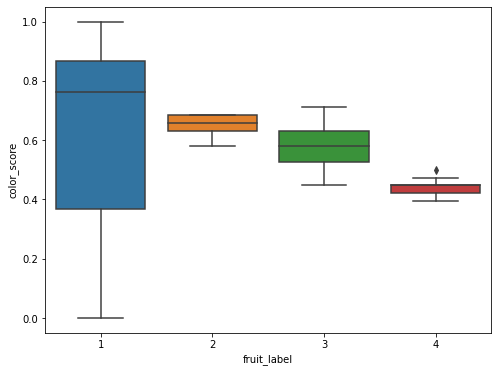

In [ ]:
for i in df.drop("fruit_label", axis= 1).columns:
  tgt_plot(i)

In [ ]:
outliers = df[(df['fruit_label']==3) & (df['height'] > (0.646154*1.2))]
outliers

,fruit_label,mass,width,height,color_score
24,3,0.930070,0.842105,0.830769,0.526316
25,3,0.979021,0.894737,0.800000,0.526316
26,3,1.000000,1.000000,0.800000,0.500000
27,3,0.447552,0.447368,0.800000,0.578947


In [ ]:
df.drop(outliers.index, axis=0, inplace = True)

# Machine Learning

In [ ]:
# Defining our target and feature variables
X = df[['height','width', 'mass']]
#Target
y = df['fruit_label']

In [ ]:
#Calculating null accuracy
y.value_counts().head(1)/len(y)


1    0.345455
Name: fruit_label, dtype: float64

With this null accuracy, we can consider any model that has an accuracy score above .345 as this is the accuracy of a "dumb" model that just predicts the modal class for all predicted instances

In [ ]:
#import the algorithm
from sklearn.linear_model import LogisticRegression
#Define the model
lr = LogisticRegression(random_state=5)
#Fit the model
lrfit = lr.fit(X,y)
#Predicting
lrpred = lr.predict(X)
lrpred

array([1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [ ]:
#Using accuracy score to evaluate
from sklearn.metrics import accuracy_score
accuracy_score(lrpred, y)
# Mean Squared Error
from sklearn.metrics import mean_squared_error
mean_squared_error(y, lrpred, squared = False)


1.0531338514599695

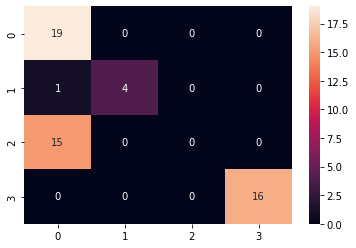

In [ ]:
#using confusion matrix to evaluate logreg
from sklearn.metrics import confusion_matrix

lr_cm = confusion_matrix(y, lrpred)
sns.heatmap(lr_cm, annot = True)

Text(0.5, 0, 'Neighbors')

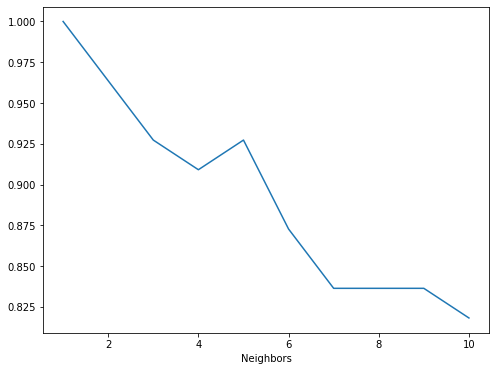

In [ ]:
from numpy.ma.core import mod
#Using KNN classifier
from sklearn.neighbors import KNeighborsClassifier
#Model scores array
mod_scores = []
for i in range(1,11):
  knn = KNeighborsClassifier(n_neighbors=i)
  knnfit = knn.fit(X,y)
  knnpred = knn.predict(X)
  mod_scores.append(accuracy_score(knnpred, y))

  

#plotting
plt.figure(figsize=(8,6))
sns.lineplot(x = range(1,11), y = mod_scores)
plt.xlabel('Neighbors')



From this we can insinate that 5 is a good number of neighbors for our classifer as it avoids issues of overfitting and underfitting

In [ ]:
#Using accuracy score to evaluate
from sklearn.metrics import accuracy_score
ac = accuracy_score(knnpred, y)
# Mean Squared Error
from sklearn.metrics import mean_squared_error
knn_rmse = mean_squared_error(y, knnpred, squared = False)
ac, knn_rmse

(0.8181818181818182, 0.8528028654224418)

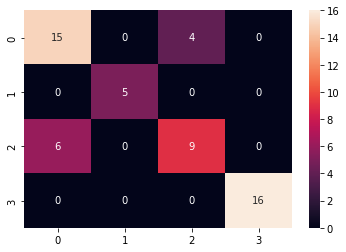

In [ ]:
#Using Confusion matrix for KNN evaluation
knn = KNeighborsClassifier(n_neighbors=i)
knn.fit(X,y)
knn_pred = knn.predict(X)
knn_cm = confusion_matrix(y, knn_pred)
sns.heatmap(knn_cm, annot= True)

Using Decision Tree Classifier

Text(0.5, 0, 'Leaves')

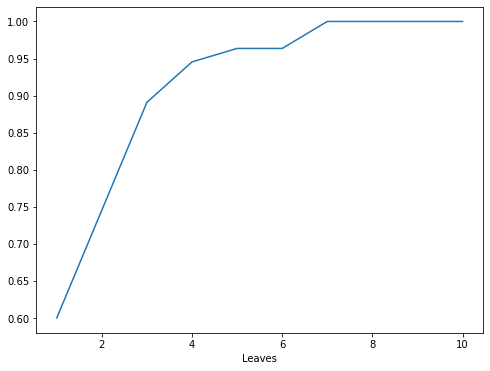

In [ ]:
from sklearn.tree import DecisionTreeClassifier


dtc_scores = []
for i in range(1,11):
  dtc = DecisionTreeClassifier(max_depth=i)
  dtcfit = dtc.fit(X,y)
  dtcpred = dtc.predict(X)
  dtc_scores.append(accuracy_score(dtcpred, y))


# Visualizing
plt.figure(figsize=(8,6))
sns.lineplot(x = range(1,11), y = dtc_scores)
plt.xlabel('Leaves')

From this we can insinate that 5 is a good number of leaves for our classifer as it avoids issues of overfitting and underfitting